In [1]:
from IPython.display import display, Image
print("okay")

okay


# 제목 : 단 하나의 정보, "사용한 연수만 가지고 맥북의 중고가 맞춰보기

====================================================================================================================

## (1) 맥북의 중고가를 결정짓는 변수는 무엇일까? 데이터 확인하기

In [2]:
import pandas as pd
# 2차원 표 데이터를 다룰 때 사용하는 모듈 import

In [4]:
macbook = pd.read_csv('~/aiffel/exp/02_regression_analysis/data/macbook.csv')
print(macbook.shape)
macbook.head()

(80, 2)


,used_years,price
0,2.65,175
1,3.80,63
2,0.95,273
3,4.50,133
4,4.45,106


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌
%config InlineBackend.figure_format = 'retina'
# 더 높은 해상도로 출력한다.
print('okay')

okay


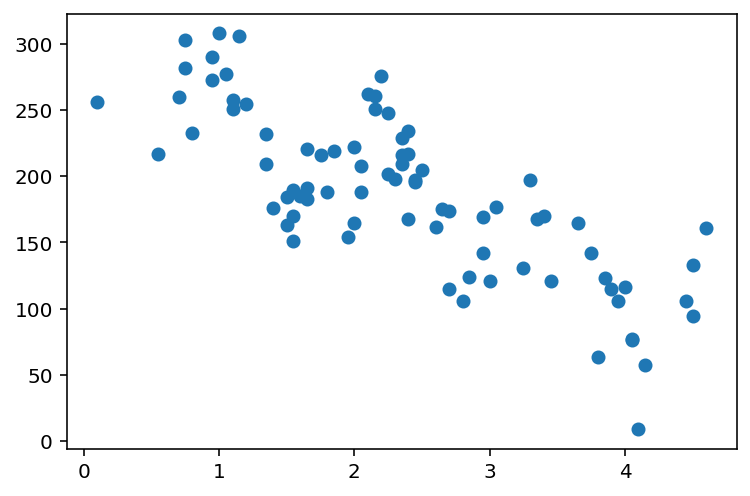

In [6]:
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

- 이렇게 한 변수가 커짐에 따라 다른변수가 작아지는 관계인 경우, 두 변수는 '상관 관계가 있다.'고 하고, 그 관계를 '피어슨 상관 계수'로 표현할 수 있다.
  
  
- 아래 이미지는 상관관계 크기에 대한 이미지이다.

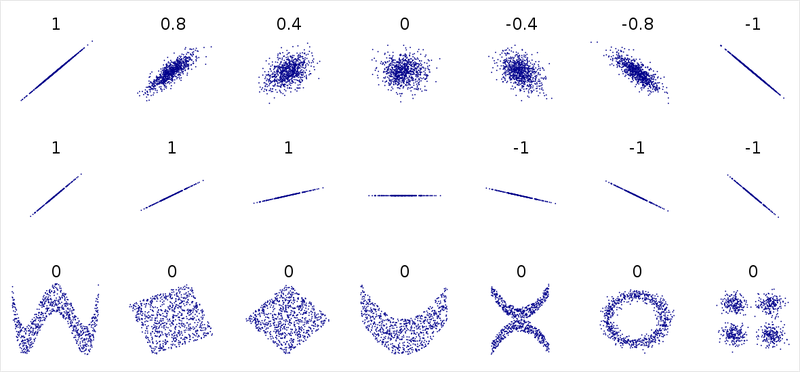

- 위 이미지처럼 상관 관계가 없다면 값은 0이고, 상관 관계가 강하다면 절대값이 점점 커진다.
  
  
- 상관 계수가 양의 값이라면 한 변수가 커질수록 다른 변수의 값도 커지게 된다.
  
  
- 상관 계수가 음의 값이라면 한 변수가 커질수록 다른 변수의 값은 작아지게 된다.
  
  
- 즉, 데이터 분포의 기울기가 양이라면 상관계수도 양의 값이고, 기울기가 음이라면 상관계수도 음의 값이다.
  
  
- 기울기가 급하든 완만하든 데이터의 분포가 직선에 가깝다면 상관계수는 항상 1 또는 -1에 근접한다.
  
  
- 상관 관계란 두 변수간의 패턴을 나타내는 것이 아닌, 각 값의 증가 또는 감소에 대한 관계만을 나타낸다.

### 상관계수 구하기

In [8]:
import numpy as np

# np.corrcoef(x, y)를 사용한다.
# corrcoef는 상관관계를 보여주는 함수
np.corrcoef(macbook['used_years'], macbook['price'])

array([[ 1.        , -0.78972238],
       [-0.78972238,  1.        ]])

- [0,0], [1,1] 의 경우 자기 자신과의 상관관계를 나타내기 때문에 항상 1의 값을 가지게 된다.
  
  
- 이 결과에서 [0,1] 과 [1,0]이 상관 계수를 보여주는 것인데 -0.79로 음의 상관계수를 나타낸다

---

## (2) "모델"을 만든다는 것, 그 의미 이해하기

- 여기서 모델이란?
  
  
- '특정 정보를 입력받아서 그 정보에 따라 원하는 값을 예측하여 값을 출력하는 함수'이다.

In [9]:
x = macbook["used_years"].values
y = macbook["price"].values
print('okay')

okay


### 일차함수 모델

- w는 기울기 , y절편은 b

In [10]:
def model(x, w, b):
    y = w * x + b
    return y
print('okay')

okay


### 모델 학습이란?
- 모델을 학습시킨다는 것은 모델이 입력을 받았을 때 정답값에 가까운 출력을 낼 수 있는 최적의 "매개변수" 혹은 "파라미터" 를 찾는다는 것과 같다.
  
  

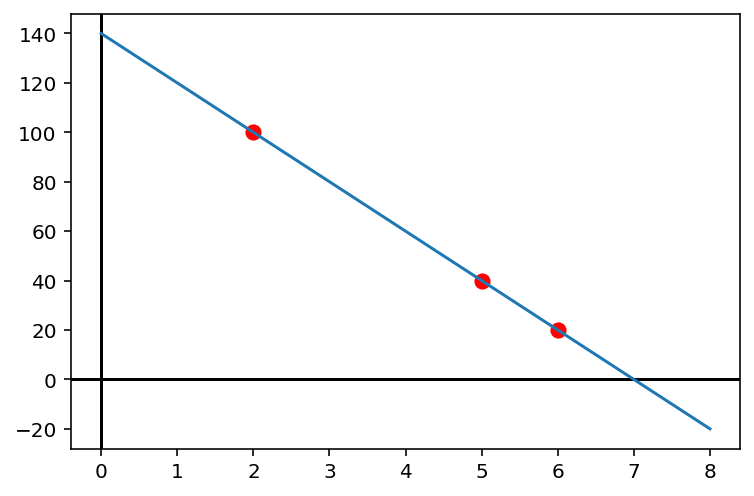

In [20]:
# x축, y축 그리기
plt.axvline(x=0, c='black')
plt.axhline(y=0, c='black')

# y= wx + b 일차함수 그리기
x = np.linspace(0, 8, 9)
y = model(x, w= -20, b=140) # y = -20x + 140
plt.plot(y)

# 나의 (x, y) 점 찍기
x_data = [2, 5, 6] # 연수
y_data = [100, 40, 20] # 함수값
plt.scatter(x_data, y_data, c='red', s=50)

plt.show()

---

## (3) 정확한 방정식이 아닌, "최적의 방정식"을 구하는 여정의 시작: 손실함수 정의하기

- 손실함수를 구하는 것은 최적의 함수를 찾기 위함.
  
   
### 손실함수 예시

In [22]:
w = 3.1
b = 2.3
# y = 3.1x + 2.3

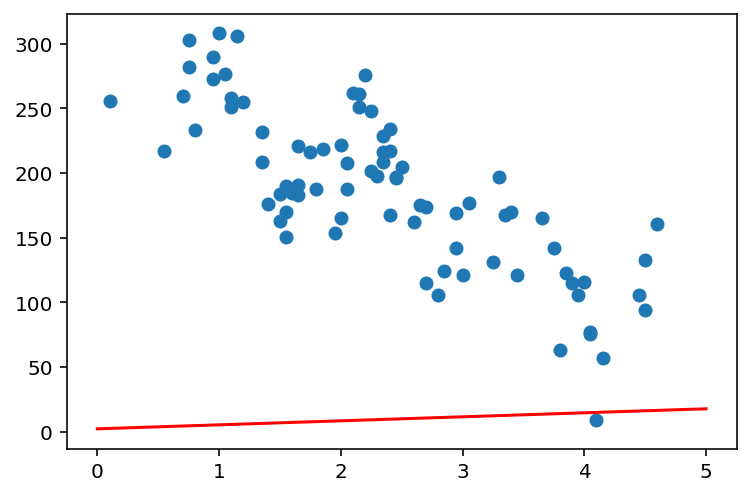

In [36]:
x = np.linspace(0, 5, 6) #(start, stop, number)
y = model(x, w, b)
plt.plot(y, c='r')

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

In [37]:
# 더 좋은 직선을 찾기위해 x를 불러온다
x = macbook["used_years"].values
x

array([2.65, 3.8 , 0.95, 4.5 , 4.45, 2.7 , 3.05, 2.25, 2.3 , 1.85, 1.5 ,
       0.95, 2.6 , 0.55, 2.05, 0.75, 3.95, 2.8 , 2.05, 1.15, 1.35, 3.35,
       1.35, 2.45, 2.4 , 0.1 , 3.45, 2.35, 0.7 , 1.05, 1.75, 4.1 , 4.5 ,
       4.  , 2.  , 2.45, 2.5 , 2.1 , 3.  , 4.05, 2.7 , 2.15, 3.3 , 2.4 ,
       2.85, 1.65, 1.55, 2.15, 3.4 , 1.55, 0.8 , 2.95, 2.4 , 1.4 , 1.65,
       2.25, 3.85, 3.9 , 4.6 , 2.35, 4.05, 1.2 , 1.95, 1.6 , 2.  , 1.8 ,
       3.75, 3.65, 2.35, 2.2 , 1.  , 4.15, 1.1 , 1.55, 2.95, 1.5 , 1.65,
       1.1 , 3.25, 0.75])

In [38]:
prediction = model(x, w, b) # 현재 w = 3.1, b = 2.3
prediction

array([10.515, 14.08 ,  5.245, 16.25 , 16.095, 10.67 , 11.755,  9.275,
        9.43 ,  8.035,  6.95 ,  5.245, 10.36 ,  4.005,  8.655,  4.625,
       14.545, 10.98 ,  8.655,  5.865,  6.485, 12.685,  6.485,  9.895,
        9.74 ,  2.61 , 12.995,  9.585,  4.47 ,  5.555,  7.725, 15.01 ,
       16.25 , 14.7  ,  8.5  ,  9.895, 10.05 ,  8.81 , 11.6  , 14.855,
       10.67 ,  8.965, 12.53 ,  9.74 , 11.135,  7.415,  7.105,  8.965,
       12.84 ,  7.105,  4.78 , 11.445,  9.74 ,  6.64 ,  7.415,  9.275,
       14.235, 14.39 , 16.56 ,  9.585, 14.855,  6.02 ,  8.345,  7.26 ,
        8.5  ,  7.88 , 13.925, 13.615,  9.585,  9.12 ,  5.4  , 15.165,
        5.71 ,  7.105, 11.445,  6.95 ,  7.415,  5.71 , 12.375,  4.625])

In [40]:
macbook['prediction'] = prediction
macbook.head()
# prediction과 price의 가격차이가 매우 많이 난다.

,used_years,price,prediction
0,2.65,175,10.515
1,3.80,63,14.080
2,0.95,273,5.245
3,4.50,133,16.250
4,4.45,106,16.095


### 정답과 예측값 간의 차이

In [41]:
macbook['error'] = macbook['price'] - macbook['prediction']
macbook.head()

,used_years,price,prediction,error
0,2.65,175,10.515,164.485
1,3.80,63,14.080,48.920
2,0.95,273,5.245,267.755
3,4.50,133,16.250,116.750
4,4.45,106,16.095,89.905


### 에러 측정 지표

- MAE(평균 절대 오차) :  데이터 세트에 대한 절대 차이를 평균화하여 추출한 원래 값과 예측된 값의 차이를 나타낸다.
  
   
- MSE(평균 제곱 오차) : 데이터 세트에 대한 평균 차이를 제곱하여 추출한 원래 값과 예측된 값의 차이를 나타낸다.
  
   
- RMSE(루트 평균 제곱 오차) : MSE의 제곱근에 의한 오류율
  
  
- R-제곱(결정 계수) : 값이 원래 값과 비교하여 얼마나 잘 맞는지에 대한 계수를 나타낸다. 0에서 1까지의 값은 백분율로 해석. 값이 높을수록 모델이 더 좋다.
  
   
- __이중 가장 많이 사용하는 것은 RMSE 이다.__

In [42]:
def RMSE(a, b):
    mse = ((a - b) ** 2).mean() # 두 값의 차이의 제곱의 평균
    rmse = mse ** 0.5
    return rmse
print('okay')

okay


In [45]:
# 위의 반복. 딱히 의미 없음
x = macbook["used_years"].values
y = macbook["price"].values

predictions = model(x, w, b)
print(predictions)

[10.515 14.08   5.245 16.25  16.095 10.67  11.755  9.275  9.43   8.035
  6.95   5.245 10.36   4.005  8.655  4.625 14.545 10.98   8.655  5.865
  6.485 12.685  6.485  9.895  9.74   2.61  12.995  9.585  4.47   5.555
  7.725 15.01  16.25  14.7    8.5    9.895 10.05   8.81  11.6   14.855
 10.67   8.965 12.53   9.74  11.135  7.415  7.105  8.965 12.84   7.105
  4.78  11.445  9.74   6.64   7.415  9.275 14.235 14.39  16.56   9.585
 14.855  6.02   8.345  7.26   8.5    7.88  13.925 13.615  9.585  9.12
  5.4   15.165  5.71   7.105 11.445  6.95   7.415  5.71  12.375  4.625]


In [47]:
rmse = RMSE(predictions, y)
rmse
# 평균 오차가 188만원 이라는 의미

188.81322969819274

### 손실함수(비용함수)
- 모델의 예측값과 정답값의 대한 차이를 계산하는 함수를 손실함수(loss function), 또는 비용함수(cost function)이라고 한다.
  
  
- 즉, 손실값이 크다는 의미는 모델이 현재 정답과 굉장히 먼 예측을 하고 있다는 뜻이고, 손실값이 작다는 것은 올바른 예측을 하고있다고 해석할 수 있다.
  
  
- 따라서, 손실값은 작을수록 좋다.

#### 손실함수 정의

In [48]:
def loss(x, w, b, y):
    predictions = model(x, w, b)
    L = RMSE(predictions, y)
    return L
print('okay')

okay


---

## (4) 모델을 점점 똑똑하게 만드는 방법? 손실함수를 줄이면 돼!

### 기울기와 경사하강법(Gradient Descent)
- 위 손실함수에서는 x와 y는 변경할 수 없다 (x= years, y=price)
  
  
- 따라서, w, b를 통해 값을 수정해 줘야한다. 이 수정할 수 있는 변수를 "파라미터" 혹은 "가중치" 라고 한다.
  
  
- 다음과 같은 규칙에 따라 w를 업데이트 한다.
  
  1. 현재 w에서의 기울기를 구한다.
  2. 기울기가 음수라면, 현재 w를 키운다.
  3. 기울기가 양수라면, 현재 w를 줄인다.
    
    
  - 수식으로 나타내면 다음과 같다.
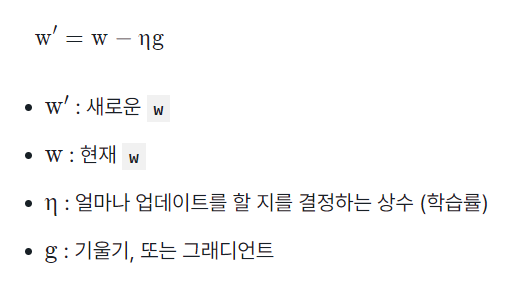
- 여기서 n은 고정상수
  
   - g를 수정하도록 한다.
   
- 이렇게 기울기를 사용해 점차적으로 매개변수를 업데이트 하는 방식을 Gradient Descent Method(경사하강법) 이라고 한다.

### 기울기를 구하는 함수 gradient

In [49]:
def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db
print('okay')

okay


---

## (5) 한번에 못해도 괜찮아, 한 단계 한 단계 학습해나가면 되니까!

### 경사하강법의 n 상수 정의

In [51]:
LEARNING_RATE = 1
print('okay')

okay


- 학습률은 1이 아니어도 된다. 어떤 학습률이 가장 좋은지는 실제 실험해보고 판단하는 것이 좋다.
  
  
- 모델이 스스로 학습하는 파라미터가 아닌 사람이 직접 사전에 정하고 시작하는 파라미터를 '하이퍼 파라미터' 라고 한다
  
   
- 여기선 1을 사용하지만 복잡한 데이터셋에서는 주로 0.0001 ~ 0.01 같은 작은 값을 사용한다.

- 다음 순서대로 코드를 구현한다.
  
  1. 입력 데이터 x와 정답 데이터 y 준비
  2. 초기 w, b를 랜덤하게 선택
  3. 현재의 w와 b로 모델이 prediction을 예측하고, 그 값과 y 값을 비교해서 손실함수값 계산
  4. 손실함수값을 계산함과 동시에 그 점에서의 기울기, gradient 계산
  5. 계산된 gradient를 활용해서 w' = w - ng, b' = b - ng로 업데이트
  6. 3 ~ 5번의 과정을 손실함수가 충분히 줄어들 때까지 반복

#### 손실함수 값을 단계별로 얼마인지 저장한 losses라는 빈 리스트를 준비 (확인용)

In [52]:
losses = []

In [54]:
for i in range(1, 2001):
    dw, db = gradient(x, w, b, y) # 3,4번 : 모델이 prediction을 예측하고, 손실함수 값을 계산함과 동시에 기울기 계산
    w -= LEARNING_RATE * dw
    b -= LEARNING_RATE * db
    L = loss(x,w,b,y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f'% (i, L))

Iteration 100 : Loss 38.3037
Iteration 200 : Loss 38.3037
Iteration 300 : Loss 38.3036
Iteration 400 : Loss 38.3036
Iteration 500 : Loss 38.3036
Iteration 600 : Loss 38.3036
Iteration 700 : Loss 38.3036
Iteration 800 : Loss 38.3036
Iteration 900 : Loss 38.3036
Iteration 1000 : Loss 38.3036
Iteration 1100 : Loss 38.3036
Iteration 1200 : Loss 38.3036
Iteration 1300 : Loss 38.3036
Iteration 1400 : Loss 38.3036
Iteration 1500 : Loss 38.3036
Iteration 1600 : Loss 38.3036
Iteration 1700 : Loss 38.3036
Iteration 1800 : Loss 38.3036
Iteration 1900 : Loss 38.3036
Iteration 2000 : Loss 38.3036


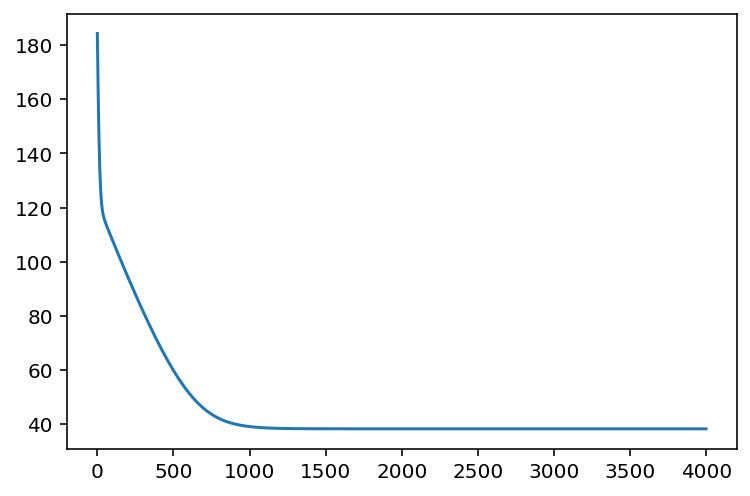

In [55]:
plt.plot(losses)
plt.show()

In [56]:
w, b

(-45.04139276170692, 293.4009811204224)

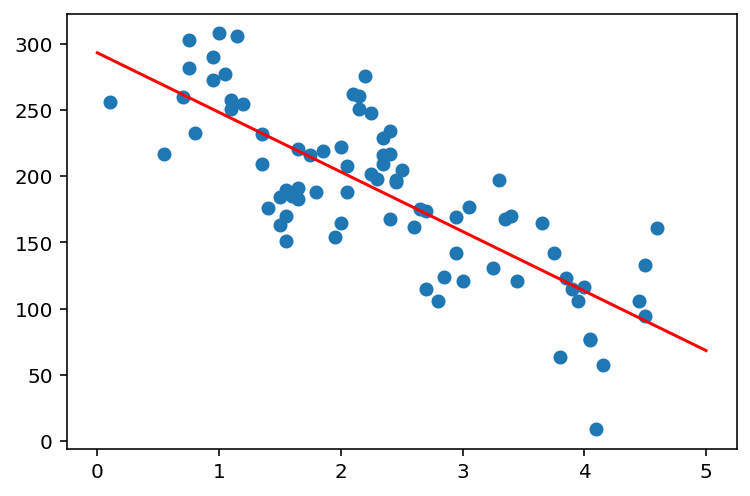

In [57]:
# 모델에 넣을 x값들 준비
x = np.linspace(0, 5, 6)

# x, w, b를 모델에 넣어 y값 출력
y = model(x, w, b) # 직선은 w, b에 영향

# 일차함수 y 그리기
plt.plot(y, c='r')

# 원본 데이터 점찍기
plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

### 새로운 데이터에도 효과적인지 확인

In [59]:
test = pd.read_csv("~/aiffel/exp/02_regression_analysis/data/macbook_test.csv")
print(test.shape)
test.head()

(20, 2)


,used_years,price
0,1.20,203
1,1.85,206
2,2.40,191
3,2.85,164
4,3.05,176


In [60]:
test_x = test['used_years'].values
test_y = test['price'].values

In [61]:
prediction = model(test_x, w, b)
test['prediction'] = prediction
test

,used_years,price,prediction
0,1.20,203,239.351310
1,1.85,206,210.074405
2,2.40,191,185.301638
3,2.85,164,165.033012
4,3.05,176,156.024733
5,3.35,136,142.512315
6,2.55,133,178.545430
7,2.60,181,176.293360
8,2.50,181,180.797499
9,3.10,86,153.772664


In [62]:
test['error'] = test['price'] - test['prediction']
test

,used_years,price,prediction,error
0,1.20,203,239.351310,-36.351310
1,1.85,206,210.074405,-4.074405
2,2.40,191,185.301638,5.698362
3,2.85,164,165.033012,-1.033012
4,3.05,176,156.024733,19.975267
5,3.35,136,142.512315,-6.512315
6,2.55,133,178.545430,-45.545430
7,2.60,181,176.293360,4.706640
8,2.50,181,180.797499,0.202501
9,3.10,86,153.772664,-67.772664


In [63]:
rmse = ((test['error']**2).sum() / len(test)) ** 0.5
rmse

45.06325747603289

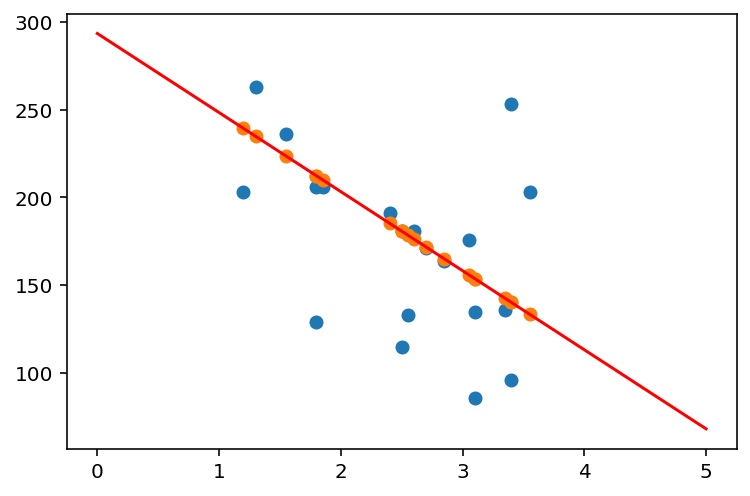

In [64]:
# 모델 일차함수 그리기
x = np.linspace(0, 5, 6)
y = model(x, w, b)
plt.plot(y, c='r')

# 실제 데이터 값
plt.scatter(test['used_years'], test['price'])

# 모델이 예측한 값
plt.scatter(test['used_years'], test['prediction'])
plt.show()

---